In [15]:
import numpy as np
import h5py

# Open your original HDF5 file
with h5py.File("TrainingData5zeroes midpoints.h5", 'r') as hdf:
    # Read the 'boxes' dataset
    boxes = np.array(hdf['boxes'])

# Calculate the center coordinates
center_coordinates = np.zeros((boxes.shape[0], boxes.shape[1], 3))  # Adjust dimensions as needed
center_coordinates[:, :, 0] = boxes[:, :, 0]  # Copy the probabilities
center_coordinates[:, :, 1] = (boxes[:, :, 1] + boxes[:, :, 3]) / 2  # Center X
center_coordinates[:, :, 2] = (boxes[:, :, 2] + boxes[:, :, 4]) / 2  # Center Y

# Optionally, save the center coordinates back to the HDF5 file or a new file
with h5py.File("TrainingData5zeroes midpoints.h5", 'a') as hdf:  # 'a' for append, or 'w' to overwrite/create new
    # If 'center_coordinates' key already exists, we should remove it first
    if 'center_coordinates' in hdf.keys():
        del hdf['center_coordinates']
    
    # Create a new dataset in the file for the center coordinates
    hdf.create_dataset('center_coordinates', data=center_coordinates)

    # Verify the keys in the file
    print("Keys in the new HDF5 file:", list(hdf.keys()))



Keys in the new HDF5 file: ['boxes', 'center_coordinates', 'images']


In [21]:
 boxes[16]

array([[ 1., 58., 33., 59., 34.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [25]:
import numpy as np
import h5py

# Path to your HDF5 file
file_path = "TrainingData5zeroes midpoints.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    # Read the 'images' dataset
    images = np.array(hdf['images'])
    print("Images loaded, shape:", images.shape)
    
    # Read the 'boxes' dataset
    boxes = np.array(hdf['boxes'])
    print("Boxes loaded, shape:", boxes.shape)
    
    # Read the 'center_coordinates' dataset
    center_coordinates = np.array(hdf['center_coordinates'])
    print("Center coordinates loaded, shape:", center_coordinates.shape)

# Now you have the arrays loaded:
# 'images', 'boxes', and 'center_coordinates'
# You can process or analyze these as needed.


Images loaded, shape: (10000, 64, 64)
Boxes loaded, shape: (10000, 280, 5)
Center coordinates loaded, shape: (10000, 280, 3)


In [34]:
center_coordinates[334]

array([[ 1. , 26. , 48.5],
       [ 1. , 53.5, 57. ],
       [ 1. , 45.5, 62. ],
       [ 1. , 45. , 49.5],
       [ 1. ,  9.5, 55.5],
       [ 1. , 53.5, 41.5],
       [ 1. ,  1. , 15.5],
       [ 1. , 60. , 49.5],
       [ 1. , 26.5, 23. ],
       [ 1. , 22.5, 14. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ],
 

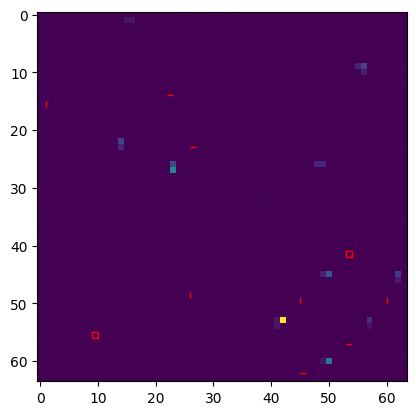

In [36]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Open your HDF5 file to read the data
file_path = "TrainingData5zeroes midpoints.h5"
with h5py.File(file_path, 'r') as hdf:
    images = np.array(hdf['images'])  # Assuming images are stored properly and can be visualized directly
    boxes = np.array(hdf['boxes'])  # Original bounding boxes

# Function to display a single image and its bounding boxes
def show_image_with_boxes(image, boxes, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1)
    # Show image
    ax.imshow(image)
    # Add bounding boxes
    for i in range(boxes.shape[0]):
        # Only draw if there's a valid box (assuming the first column is the class or probability > 0)
        if boxes[i, 0] > 0:
            rect = patches.Rectangle((boxes[i, 1], boxes[i, 2]), boxes[i, 3] - boxes[i, 1], boxes[i, 4] - boxes[i, 2],
                                     linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show()

# Visualize the first few images
# for i in range(min(len(images), 15)):  # Change 5 to however many images you want to show
show_image_with_boxes(images[334], boxes[334])


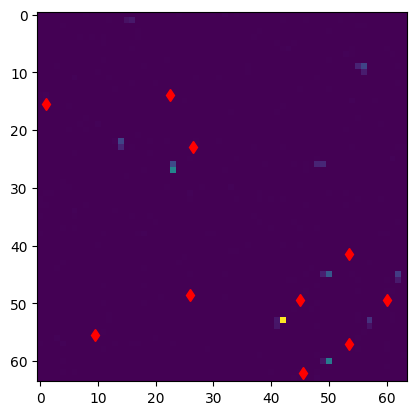

In [41]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Open your HDF5 file to read the data
file_path = "TrainingData5zeroes midpoints.h5"
with h5py.File(file_path, 'r') as hdf:
    images = np.array(hdf['images'])  # Assuming images are stored properly and can be visualized directly
    center_coordinates = np.array(hdf['center_coordinates'])  # Center coordinates

# Function to display a single image and its bounding box centers
def show_image_with_centers(image, centers, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1)
    # Show image
    ax.imshow(image)
    # Add center points
    for i in range(centers.shape[0]):
        # Only plot if the probability (or class) is greater than 0
        if centers[i, 0] > 0:
            ax.plot(centers[i, 1], centers[i, 2], 'rd')  # 'ro' stands for red circle
    plt.show()

# # Visualize the first few images
# for i in range(min(len(images), 15)):  # Change 5 to however many images you want to show
#     show_image_with_centers(images[i], center_coordinates[i])
show_image_with_centers(images[334], center_coordinates[334])

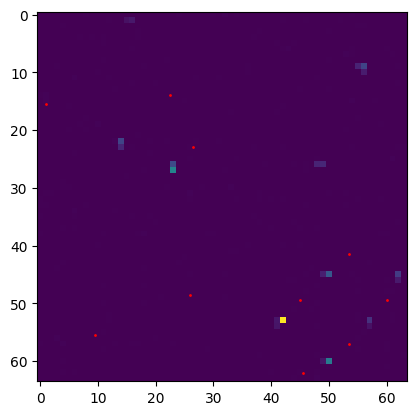

In [43]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Open your HDF5 file to read the data
file_path = "TrainingData5zeroes midpoints.h5"
with h5py.File(file_path, 'r') as hdf:
    images = np.array(hdf['images'])  # Assuming images are stored properly and can be visualized directly
    center_coordinates = np.array(hdf['center_coordinates'])  # Center coordinates

# Function to display a single image and its bounding box centers
def show_image_with_centers(image, centers, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1)
    # Show image
    ax.imshow(image)
    # Add center points
    for i in range(centers.shape[0]):
        # Only plot if the probability (or class) is greater than 0
        if centers[i, 0] > 0:
            ax.plot(centers[i, 1], centers[i, 2], 'r.', markersize=2)  # 'r.' stands for red dot, markersize controls the size
    plt.show()

# Visualize the first few images
show_image_with_centers(images[334], center_coordinates[334])
